In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../data/train.csv")

In [4]:
data = data.drop(['PassengerId','Name'], axis=1)

In [5]:
data = data.drop('Cabin', axis=1)

In [6]:
data[['Embarked']] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(data[['Embarked']]))
data[['Age']] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(data[['Age']]))

In [7]:
for col in data.columns:
    uni = data[col].unique().tolist()
    print(f"The no. of unique values of column '{col}' is: {len(uni)}")

The no. of unique values of column 'Survived' is: 2
The no. of unique values of column 'Pclass' is: 3
The no. of unique values of column 'Sex' is: 2
The no. of unique values of column 'Age' is: 89
The no. of unique values of column 'SibSp' is: 7
The no. of unique values of column 'Parch' is: 7
The no. of unique values of column 'Ticket' is: 681
The no. of unique values of column 'Fare' is: 248
The no. of unique values of column 'Embarked' is: 3


In [8]:
data = data.drop(['Ticket'], axis=1)

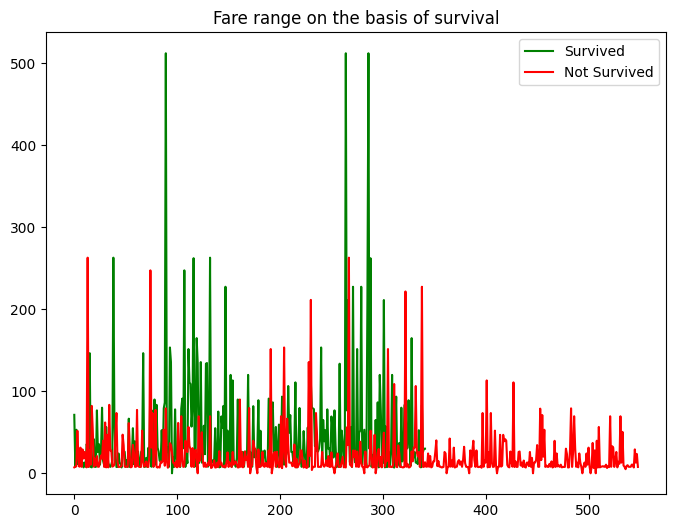

In [9]:
d1 = data[data['Survived']==1]['Fare'].tolist()
d2 = data[data['Survived']==0]['Fare'].tolist()
plt.figure(figsize=(8,6))
plt.plot(d1, color='green')
plt.plot(d2, color='red')
plt.legend(labels=['Survived','Not Survived'])
plt.title('Fare range on the basis of survival')
plt.show()

In [10]:
age_cat = []
age = data['Age']
for i in age:
    if i<13:
        age_cat.append('Children')
    elif i<20:
        age_cat.append('Teenagers')
    elif i<40:
        age_cat.append('Adults')
    elif i<60:
        age_cat.append('Middle Age')
    else:
        age_cat.append('Senior Citizen')

data['Age Category'] = age_cat

In [11]:
fare_category = []
fare = data['Fare']
for f in fare:
    if f<100:
        fare_category.append('Low')
    elif f<250:
        fare_category.append('Average')
    else:
        fare_category.append('High')
data['Fare Category'] = fare_category

In [12]:
data['Family Members'] = data['SibSp'] + data['Parch']

In [13]:
categorical = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age Category', 'Family Members', 'Fare Category']

In [14]:
df = data.copy()

In [15]:
for col in categorical:
    df[col]=df[col].astype(str)

In [16]:
def percentage(col):
    unique = df[col].unique().tolist()
    whole = df[col].tolist()
    dic = {}
    for j in unique:
        total = whole.count(j)
        surv = df.loc[(df[col]==j) & (df["Survived"]==1)].shape[0]
        perc = round(surv/total*100,2)
        dic[j] = perc
    return dic

In [17]:
def visual(col):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=col, hue='Survived', palette='viridis')
    plt.title("Survived and Not Survived count")
    plt.subplot(1,2,2)
    plt.bar(x=percentage(col).keys(), height=percentage(col).values(), color='teal',alpha=0.6,edgecolor='black')
    plt.title(f"Survival rate w.r.t. each category of column '{col}'")

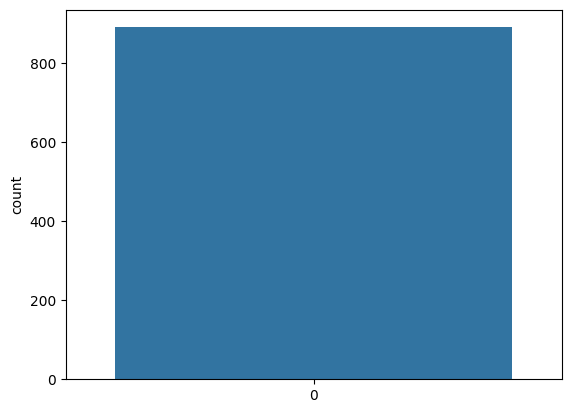

In [18]:
sns.countplot(df['Pclass'])
plt.show()

In [19]:
percentage('Pclass')

{'3': 24.24, '1': 62.96, '2': 47.28}

In [20]:
columns = ['Pclass', 'Sex', 'Age', 'Family Members', 'Embarked', 'Fare Category']

In [21]:
x = data[columns]
y = data['Survived']

In [22]:
for col in ['Sex','Embarked', 'Fare Category']:
    x[col]=LabelEncoder().fit_transform(x[col])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [24]:
LR = LogisticRegression().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)
DT = DecisionTreeClassifier().fit(x_train, y_train)
RF = RandomForestClassifier().fit(x_train, y_train)
NB = GaussianNB().fit(x_train, y_train)
GBR = GradientBoostingClassifier().fit(x_train, y_train)
XGB = XGBClassifier().fit(x_train, y_train)

In [25]:
mod = [LR,KNN,DT,RF,NB,GBR,XGB]

In [26]:
accuracy = [accuracy_score(y_test, model.predict(x_test)) for model in mod]
models = ['Logistic Regression','K Nearest Neighbour', 'Decision Tree', 'Random Forest',
         'Naive Bayes', 'Gradient Boosting', 'XgBoost']
acc = pd.DataFrame({'Models':models,'Accuracy':accuracy})

In [27]:
acc

,Models,Accuracy
0,Logistic Regression,0.810056
1,K Nearest Neighbour,0.776536
2,Decision Tree,0.787709
3,Random Forest,0.826816
4,Naive Bayes,0.782123
5,Gradient Boosting,0.826816
6,XgBoost,0.826816


In [28]:
confusion_matrix(y_test, XGB.predict(x_test))

array([[92, 13],
       [18, 56]])

In [29]:
print(classification_report(y_test, XGB.predict(x_test)))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [30]:
test = pd.read_csv("../data/test.csv")

In [31]:
ID = test['PassengerId']

In [32]:
test[['Age']] = pd.DataFrame(SimpleImputer().fit_transform(test[['Age']]))

In [33]:
test['Family Members'] = test['SibSp'] + test['Parch']

In [34]:
t = []
for i in range(418):
    if test['Fare'][i]<100:
        t.append('Low')
    elif test['Fare'][i]<250:
        t.append('Average')
    else:
        t.append('High')
test['Fare Category'] = t

In [35]:
# dropping extra columns
eliminate = [col for col in test.columns if col not in ['Pclass', 'Sex', 'Age', 'Family Members', 'Embarked', 'Fare Category']]
test = test.drop(eliminate, axis=1)


In [36]:
test.isnull().sum()

Pclass            0
Sex               0
Age               0
Embarked          0
Family Members    0
Fare Category     0
dtype: int64

In [37]:
for col in ['Sex','Embarked', 'Fare Category']:
    test[col]=LabelEncoder().fit_transform(test[col])

In [38]:
test

,Pclass,Sex,Age,Embarked,Family Members,Fare Category
0,3,1,34.50000,1,0,2
1,3,0,47.00000,2,1,2
2,2,1,62.00000,1,0,2
3,3,1,27.00000,2,0,2
4,3,0,22.00000,2,2,2
...,...,...,...,...,...,...
413,3,1,30.27259,2,0,2
414,1,0,39.00000,0,0,0
415,3,1,38.50000,2,0,2
416,3,1,30.27259,2,0,2


In [39]:
x_test

,Pclass,Sex,Age,Family Members,Embarked,Fare Category
709,3,1,29.699118,2,0,2
439,2,1,31.000000,0,2,2
840,3,1,20.000000,0,2,2
720,2,0,6.000000,1,2,2
39,3,0,14.000000,1,0,2
...,...,...,...,...,...,...
433,3,1,17.000000,0,2,2
773,3,1,29.699118,0,0,2
25,3,0,38.000000,6,2,2
84,2,0,17.000000,0,2,2


In [40]:
test

,Pclass,Sex,Age,Embarked,Family Members,Fare Category
0,3,1,34.50000,1,0,2
1,3,0,47.00000,2,1,2
2,2,1,62.00000,1,0,2
3,3,1,27.00000,2,0,2
4,3,0,22.00000,2,2,2
...,...,...,...,...,...,...
413,3,1,30.27259,2,0,2
414,1,0,39.00000,0,0,0
415,3,1,38.50000,2,0,2
416,3,1,30.27259,2,0,2


In [41]:
y_test = test[['Pclass','Sex','Age','Family Members','Embarked','Fare Category']]

In [42]:
pred = XGB.predict(y_test)
submission = pd.DataFrame({'PassengerId':ID, 'Survived':pred})

In [43]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [44]:
submission.to_csv('submission.csv', index=False)